<div style="text-align: center">
    <img src='UDC.png' width='40%'>
    <img src='ICI.png' width='20%'>
</div>
<div style="text-align: center">
    <p style="text-align: center">Universidad de Colima<br>
    Facultad de Ingeniería Mecánica y Eléctrica<br>
    Ingeniería en Computación Inteligente</p>
    <p style="text-align: center">Análisis de Estacionaliad  de una Serie Temporal<br>
    Análisis de Series Temporales</p>
    <p style="text-align: center">
    Larios Bravo Cristian Armando 20188165<br>
    </p>
    <p style="text-align: center">6°D</p>
</div>
<div style="text-align: right">
    Lugar: Mexico, Colima, Coquimatlan.<br>
    Fecha: 19/04/2024.
</div>

# Análisis de Estacionaliad  de una Serie Temporal

### Se tiene un conjunto de datos que representa la temperatura media mensual de una ciudad a lo largo de varios años. La serie de tiempo ha mostrado fluctuaciones que podrían ser tanto estacionales como tendenciales.

## Datos:
### Los datos se van a generar mediante el siguiente código en Python, que simula la temperatura media mensual en grados Celsius a lo largo de 10 años con una tendencia y estacionalidad anual:

In [11]:
import pandas as pd
import numpy as np

np.random.seed(0)
t = np.arange(120)
data = 20 + 0.05 * t + 10*np.sin(2 * np.pi * t / 12) + np.random.normal(size=120)
serie_temporal  = pd.Series(data, index=pd.date_range(start="2010-01-01", periods=120, freq="ME"))

## Actividades

### 1. Visualización de la Serie Temporal: Grafica la serie temportal y determina visualmente si muestra estacionalidad, tendencia o ambas. Escribe tus observaciones

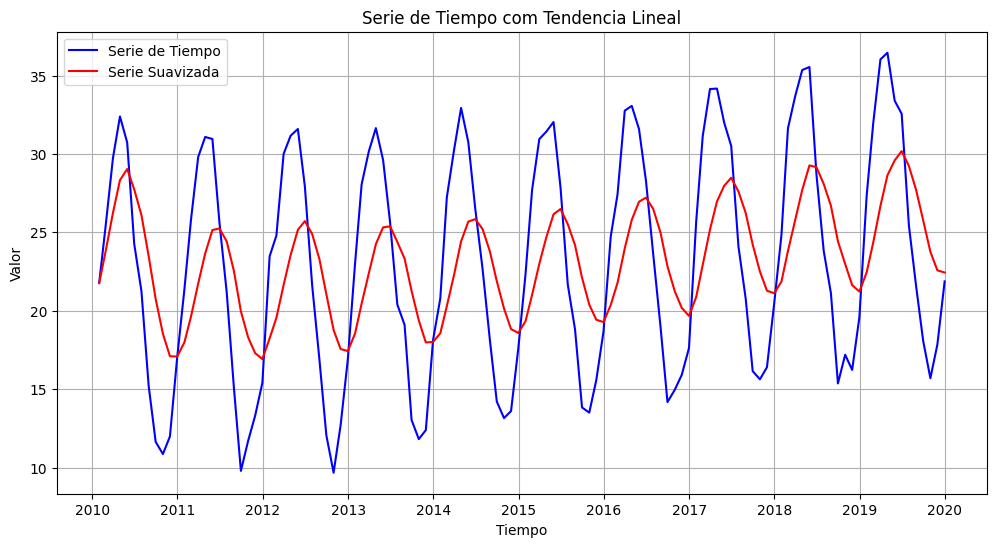

In [17]:
import matplotlib.pyplot as plt

# Aplicar suavizado exponencial simple
alfa = 0.2 # Factor de suavizado
serie_suavizada = serie_temporal.ewm(alpha=alfa).mean()

# Visualizar la serie
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label="Serie de Tiempo", color="blue")
plt.plot(serie_suavizada, label="Serie Suavizada", color="red")
plt.title("Serie de Tiempo com Tendencia Lineal")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.grid()
plt.show()

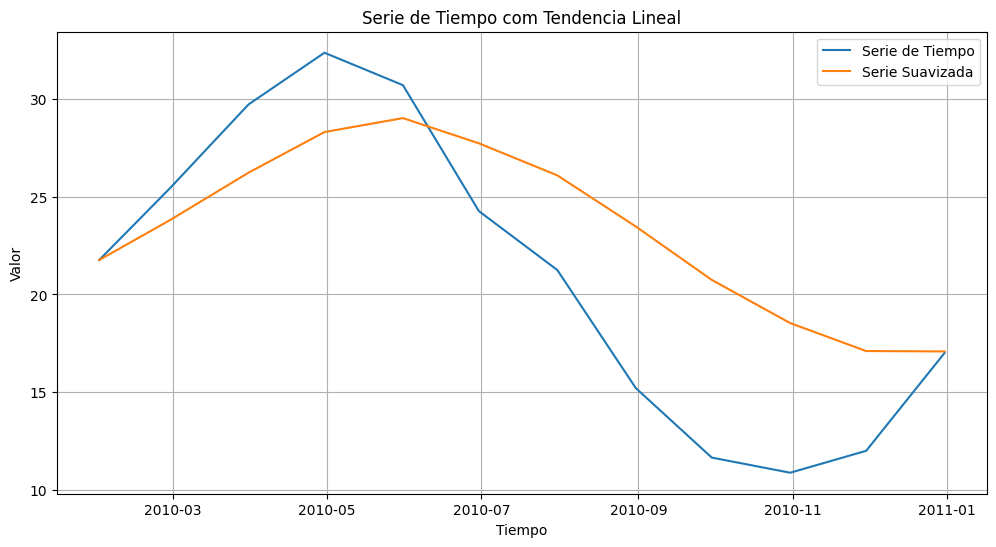

In [18]:
# Grafica de serie de tiempo en un año
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal["2010"], label="Serie de Tiempo")
plt.plot(serie_suavizada["2010"], label="Serie Suavizada")
plt.title("Serie de Tiempo com Tendencia Lineal")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.grid()
plt.show()

**OBSERVACIONES**
* Se puede apreciar estacionalidad ya que en cada año, hay un pico positivo en mayo y un pico negativo en noviembre. Esto de manera ciclíca.
* No hay una tendencia fija, pero hay de dos tendencias:
    * Tendencia de crecimiento de noviembre-mayo
    * Tendencia de decrecimiento de mayo-noviembre

### 2. Transformaciones: Aplica una transformación de diferenciación a la serie para intentar hacerla estacionaria. Grafica la serie original y la serie transformada en el mismo gráfico para comprobarlas

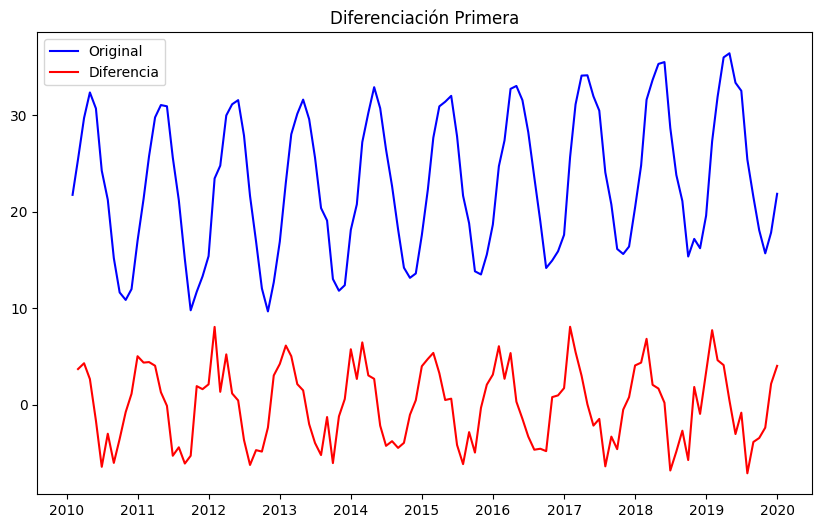

In [14]:
# Diferenciacion primera
diferencia = serie_temporal.diff().dropna()

# Visualizar
plt.figure(figsize=(10, 6))
plt.plot(serie_temporal, label='Original', color='blue')
plt.plot(diferencia, label='Diferencia', color='red')
plt.title('Diferenciación Primera')
plt.legend()
plt.show()

### 3. Pruebas de Estacionariedad: Realiza la prueba de Dickey-Fuller aumentada (ADF) para la serie original y la serie transformada. Interpreta los resultados de las pruebas. Explica si alguna de las series (original o transformada) puede considerarse estacionaria según los resultados de las pruebas.

In [15]:
from statsmodels.tsa.stattools import adfuller

# Aplicar prueba ADF a la serie original
resultado_adfOriginal = adfuller(serie_temporal)
print(f"\tSERIE ORIGINAL\n")
print(f"ADF Statistic: {resultado_adfOriginal[0]}")
print(f"p-value: {resultado_adfOriginal[1]}")
# Interpretar el resultado basado en el valor p
if resultado_adfOriginal[1] <0.05:
    print("Rechazamos la hipótesis nula: la serie es estacionaria")
else:
    print("No podemos rechazar la hipótesis nula: la serie no es estacionaria")

	SERIE ORIGINAL

ADF Statistic: 2.0631554293063212
p-value: 0.9987496009552816
No podemos rechazar la hipótesis nula: la serie no es estacionaria


In [16]:
# Aplicar prueba ADF a la serie diferenciada
resultado_adfDiferenciada = adfuller(diferencia)
print(f"\tSERIE DIFERENCIADA\n")
print(f"ADF Statistic: {resultado_adfDiferenciada[0]}")
print(f"p-value: {resultado_adfDiferenciada[1]}")
# Interpretar el resultado basado en el valor p
if resultado_adfDiferenciada[1] <0.05:
    print("Rechazamos la hipótesis nula: la serie es estacionaria")
else:
    print("No podemos rechazar la hipótesis nula: la serie no es estacionaria")

	SERIE DIFERENCIADA

ADF Statistic: -7.86838230020556
p-value: 5.062168776405316e-12
Rechazamos la hipótesis nula: la serie es estacionaria


* La serie Diferenciada puede ser considerada estacionada según los resultados de la prueba Dickey-Fuller aumentada (ADF) ya que su media y varianza son mas constantes a lo largo del tiempo, por otra angulo, la original son muy bruscas sus variaciones.
* Gracias a las transformaciones aplicadas se ha obtenido una mejor efectividad, ahora se sabe que los picos mas altos de temperatura fueron en mayo de los años 2012, 2017 y 2019.
* Se obtuvieron picos mas altos de temperatura en junio de 2010 y 2019 al aplicar suavizado.